In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.spatial import distance

# I. Sample mean and sample covariance
This task is to 
1. generate random one-dimensional normally distributed variables;
2. draw distribution of generated samples;
3. compute sample mean and sample covariance of generated data.

## 1. Generate
Generate a set of 10000 random one-dimensional normally distributed variables.   

You may need to employ `np.random.randn(...)` .  
You can use Sift+Tab in the end of typing function or `?` magic command before the function to check the usage pattern of a function.

In [2]:
? np.random.randn

Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the ``standard_normal`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python float is return

In [3]:
# Your code below
dat_1d = np.random.randn(10000)

## 2. Observe
Draw distribution of generated samples by `plt.hist(...)` .  
40 - 100 bins is an optimal choice.

Text(0, 0.5, 'Frequency')

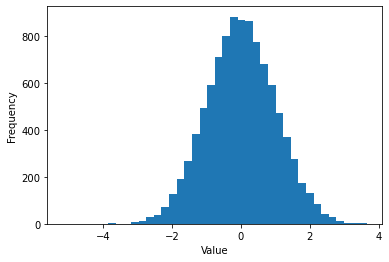

In [4]:
# Your code below
plt.hist(dat_1d, bins=40)
plt.xlabel('Value')
plt.ylabel('Frequency')

## 3. Compute statistics
Compute the sample mean and the sample covariance of the generated data.

In [5]:
def sample_mean(dat):
    # Your code below
    s_mean = sum(dat)/dat.shape[0]
    
    return s_mean

def smean_iscorrect(dat):
    return np.isclose(sample_mean(dat), dat.mean(), rtol=1e-14)

Check correctness of your `sample_mean(...)`

In [6]:
sample_mean(dat_1d)

0.008953910871729807

In [7]:
smean_iscorrect(dat_1d)

True

In [8]:
def sample_covariance(dat):
    # Your code below
    s_cov = np.sum((dat-sample_mean(dat))**2)/(dat.shape[0]-1)
    
    return s_cov

def scov_iscorrect(dat):
    return np.isclose(sample_covariance(dat), np.cov(dat, bias=False), rtol=1e-14)

In [9]:
sample_covariance(dat_1d)

0.9940598824192185

In [10]:
scov_iscorrect(dat_1d)

True

# II. Probability mass 
_Imagine that your shouting robot Dartsy1D tryes to hit the target - the centre of a one-dimensional interval.  
Find the probability to hit segment defined by the iso-contour value 1 ($\pm \sigma$). Dartsy1D's shooting accuracy is normally distributed.  
Find the same meausre for $\pm 2 \sigma$ and $\pm 3 \sigma$._ 

![](Dartsy1D.png)

This task is to theoretically find the portion of data within 1/2/3-Sigma interval (or iso-contour).  
For simplicity consider standard one-dimensional Normallly distributed accuracy for this task.  
You may need to recall cumulative density function and use `norm.cdf`

In [11]:
def portion_standard(n_sigmas):
    '''
    Probability to meet a sample value within 1-, 2-, 3-Sigma interval of std. normal distribution
    
    Parameters
    ----------
    n_sigmas : number of Sigma intervals from the mean
    
    Returns
    -------
    port : probability
    '''
    assert n_sigmas == 1 or n_sigmas == 2 or n_sigmas == 3, 'Choose 1, 2 or 3'
    
    # Your code below
    port = norm.cdf(n_sigmas) - norm.cdf(-n_sigmas)
    
    return port

In [12]:
portion_standard(1)

0.6826894921370859

# 3 Mahalanobis distance
In this task we compare euclidian and mahalanobis distances in 2D.  
For that we measure the distances to some test point from mean values of two Gaussian distributions

In [13]:
# Distributions
mean1 = [-10,0]
cov1 = np.array([
    [1,0],
    [0,1]])

mean2 = [10,0]
cov2 = np.array([
    [6,0],
    [0,6]])

## 1. Sample two normal 2D-distributions
You may need to use `np.random.multivariate_normal(...)`

In [14]:
n = 1000
# Your code below
cloud1 = np.random.multivariate_normal(mean1, cov1, n)
cloud2 = np.random.multivariate_normal(mean2, cov2, n)

cloud1.shape # Should be (n, 2)

(1000, 2)

In [15]:
# Test point
test_point = [-5,5]

In [16]:
def plot_scene(cloud1, cloud2, mean1, mean2, test_point):
    plt.figure(figsize=(10,7))
    plt.scatter(cloud1[:,0], cloud1[:,1], marker='.', c='g', label='Cloud 1')
    plt.scatter(cloud2[:,0], cloud2[:,1], marker='.', c='b', label='Cloud 2')
    plt.scatter(mean1[0], mean1[1], marker='o', c='y', s=200, label='Mean 1')
    plt.scatter(mean2[0], mean2[1], marker='o', c='r', s=200, label='Mean 2')
    plt.scatter(test_point[0], test_point[1], marker='x', c='k', s=200, label='Test point')
    plt.plot([test_point[0], mean1[0]], [test_point[1], mean1[1]], '--', color='y')
    plt.plot([test_point[0], mean2[0]], [test_point[1], mean2[1]], '--', color='r')
    plt.legend()
    plt.axis('equal')
    plt.grid()

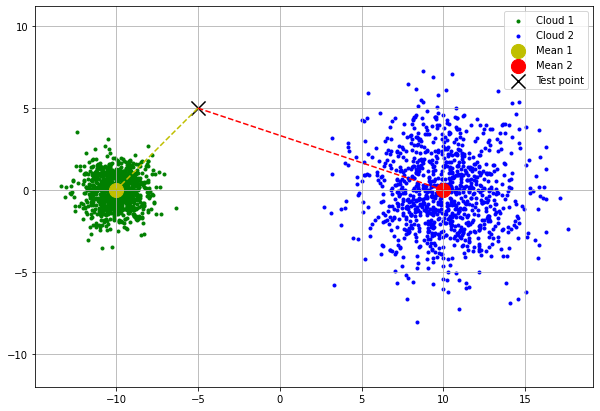

In [17]:
plot_scene(cloud1, cloud2, mean1, mean2, test_point)

Answer the question: What point cloud mean is closer to test point?  
Provide the answer for both, euclidean and mahalanobis measure.  
You may need to use SciPy `distance` module.

In [18]:
# Eucledian distance (test_point, mean1)
# Your code below
distance.euclidean(test_point, mean1)

7.0710678118654755

In [19]:
# Eucledian distance (test_point, mean2)
# Your code below
distance.euclidean(test_point, mean2)

15.811388300841896

In [20]:
# Mahalanobis distance (test_point, mean1)
# Your code below
distance.mahalanobis(test_point, mean1, np.linalg.inv(cov1))

7.0710678118654755

In [21]:
# Mahalanobis distance (test_point, mean2)
# Your code below
distance.mahalanobis(test_point, mean2, np.linalg.inv(cov2))distance.mahalanobis(test_point, mean2, np.linalg.inv(cov2))

6.454972243679028